In [1]:
import pandas as pd
import numpy as np

In [2]:
# get raw data
patient_data = pd.read_csv('data/Patient_Demo.csv')
hospital_data = pd.read_csv('data/Patient_Hospital_Visit.csv')

In [3]:
print(patient_data.shape)
print(hospital_data.shape)

(150058, 5)
(448600, 9)


In [4]:
patient_data.head()

,institution_id,patient_id,dob,sex,state
0,9db63f62-5c58-4303-919e-e23681909271,273KC6WWA,1993-03-06,male,Ogun
1,6762b0cd-12c6-4026-8886-ce15a48a6398,28D62KK5S,1959-04-20,male,kano
2,0fa2e546-c292-4060-a05e-beb53fc31e72,2CEW8BKP6,1935-10-09,female,delta
3,4bb14745-4254-4247-9b84-bd4fc63583b0,2DKKD2X8R,1950-12-03,male,Cross River State
4,3b883d89-83bd-41a1-9eb1-ee76eb22d897,2GBEK724E,1981-07-13,male,Akwa Ibom


In [5]:
hospital_data.head()

,visit_id,patient_id,institution_id,admitted_at,discharged_at,inserted_at,updated_at,visit_type,type
0,c7febda4-7460-45d9-b5a4-b8d56e0ed102,3KD75TWXQ,4850e9c9-2945-4087-b4f9-6c302e44b84e,NaN,NaN,2021-09-10,2021-09-10 18:30:57.125970,out-patient,hospital
1,5299e941-0936-4e5d-a615-c4ba1c40bd7d,5CQ5ZPTU3,b05bec66-9c3b-4381-9ad2-0636481ca919,NaN,NaN,2021-05-19,2021-05-19 17:00:05.466195,out-patient,hospital
2,79bd7fc4-45c1-4a80-87f0-62b446b66b10,6YNECWS7F,b05bec66-9c3b-4381-9ad2-0636481ca919,NaN,NaN,2021-11-22,2021-11-22 10:28:32.551820,out-patient,hospital
3,eace4e9a-ef8a-433e-8134-4ea2a28a75f8,A456Q4VZ5,f7427dbb-e87d-4ed2-b168-136c244596b2,NaN,NaN,2021-04-16,2021-04-16 09:27:47.728220,out-patient,hospital
4,3250d7a4-05a4-46f0-a561-1d5871e45d89,A89QTDQFZ,60a3c3ea-eff0-4b6a-9d8c-52a6b4fc54e7,NaN,NaN,2021-11-18,2021-11-18 09:28:28.459856,out-patient,hospital


In [6]:
hospital_data.visit_type.value_counts()

visit_type
out-patient    430614
in-patient      17986
Name: count, dtype: int64

In [7]:
hospital_data.type.value_counts()

type
hospital      419079
clinic         20160
laboratory      9361
Name: count, dtype: int64

In [8]:
hospital_data.patient_id.nunique()

150513

In [9]:
hospital_data.institution_id.value_counts()

institution_id
d9f64a07-9c47-4f6e-8bbe-a473a688a735    34167
19ae2f00-60e7-4db1-8719-644820cc04df    25540
097d4418-6d7c-4922-a703-bde5a6b64919    19118
3bbbf782-497c-4697-abda-0a88bbee1b38    16945
5ee1f2ed-2622-4012-8c2f-aca9f5c1af3f    16168
                                        ...  
f02e16c7-d27d-429a-b9aa-22e4970ba8ae        1
6386a4aa-1ebf-49d1-b20c-fff371ff4062        1
a5dc9250-f244-43f1-9580-73efa18b142a        1
4665b00a-d897-4a96-b663-465645ce383e        1
d35a70f1-8b1d-4f2d-99c0-6bd0b49f2aa0        1
Name: count, Length: 140, dtype: int64

In [10]:
hospital_data[~hospital_data.admitted_at.isna()].shape

(17986, 9)

In [11]:
hospital_data[~hospital_data.discharged_at.isna()].shape

(18086, 9)

### Handle Patient data

In [12]:
patient_data.head()

,institution_id,patient_id,dob,sex,state
0,9db63f62-5c58-4303-919e-e23681909271,273KC6WWA,1993-03-06,male,Ogun
1,6762b0cd-12c6-4026-8886-ce15a48a6398,28D62KK5S,1959-04-20,male,kano
2,0fa2e546-c292-4060-a05e-beb53fc31e72,2CEW8BKP6,1935-10-09,female,delta
3,4bb14745-4254-4247-9b84-bd4fc63583b0,2DKKD2X8R,1950-12-03,male,Cross River State
4,3b883d89-83bd-41a1-9eb1-ee76eb22d897,2GBEK724E,1981-07-13,male,Akwa Ibom


In [13]:
patient_data.shape

(150058, 5)

In [14]:
patient_data.institution_id.nunique(), patient_data.patient_id.nunique()

(140, 150057)

In [15]:
patient_data.sex.value_counts()

sex
female    81170
male      68718
Name: count, dtype: int64

In [16]:
sum(patient_data.sex.isna())

170

#### Handle state

In [17]:
patient_data.state.nunique()

1534

In [18]:
patient_data.state.value_counts()

state
Lagos                   10423
AKS                      9499
LAGOS                    8971
kano                     6001
KANO                     5458
                        ...  
calaba                      1
Beune                       1
O                           1
edomonday ikhianosen        1
Ofada                       1
Name: count, Length: 1534, dtype: int64

In [19]:
patient_data.state = patient_data.state.str.lower()

In [20]:
patient_data['state'] = patient_data['state'].fillna('')
patient_data['state'] = patient_data['state'].astype(str)

In [21]:
patient_data.state.nunique()

1081

In [22]:
patient_data.state.value_counts()

state
          36772
lagos     23783
aks       14320
kano      13089
delta      7730
          ...  
nigga         1
odun          1
egunu         1
calaba        1
ofada         1
Name: count, Length: 1081, dtype: int64

In [23]:
import json

# get all states and cities from json file
nigeria_states = json.load(open('data/states-and-cities.json','r'))
# nigeria_states = [str(state).lower() for state in nigeria_states]
print(nigeria_states)

[{'name': 'Abia', 'cities': ['Aba South', 'Arochukwu', 'Bende', 'Ikwuano', 'Isiala Ngwa North', 'Isiala Ngwa South', 'Isuikwuato', 'Obi Ngwa', 'Ohafia', 'Osisioma', 'Ugwunagbo', 'Ukwa East', 'Ukwa West', 'Umuahia North', 'Umuahia South', 'Umu Nneochi']}, {'name': 'Adamawa', 'cities': ['Fufure', 'Ganye', 'Gayuk', 'Gombi', 'Grie', 'Hong', 'Jada', 'Lamurde', 'Madagali', 'Maiha', 'Mayo Belwa', 'Michika', 'Mubi North', 'Mubi South', 'Numan', 'Shelleng', 'Song', 'Toungo', 'Yola North', 'Yola South']}, {'name': 'Akwa Ibom', 'cities': ['Eastern Obolo', 'Eket', 'Esit Eket', 'Essien Udim', 'Etim Ekpo', 'Etinan', 'Ibeno', 'Ibesikpo Asutan', 'Ibiono-Ibom', 'Ika', 'Ikono', 'Ikot Abasi', 'Ikot Ekpene', 'Ini', 'Itu', 'Mbo', 'Mkpat-Enin', 'Nsit-Atai', 'Nsit-Ibom', 'Nsit-Ubium', 'Obot Akara', 'Okobo', 'Onna', 'Oron', 'Oruk Anam', 'Udung-Uko', 'Ukanafun', 'Uruan', 'Urue-Offong/Oruko', 'Uyo']}, {'name': 'Anambra', 'cities': ['Anambra East', 'Anambra West', 'Anaocha', 'Awka North', 'Awka South', 'Ayamelum

In [24]:
# !pip install thefuzz

In [25]:
from thefuzz import fuzz

In [26]:
# print(fuzz.ratio('Ilorin East', 'ilorin'))
# print(fuzz.partial_ratio('abuja capital territory', 'abuja'))
print(fuzz.token_sort_ratio('.f.c.t', 'fct'))
# print(fuzz.token_set_ratio('abuja capital territory', 'abuja'))

50


In [27]:
patient_data[patient_data.state.str.contains('state')]

,institution_id,patient_id,dob,sex,state
3,4bb14745-4254-4247-9b84-bd4fc63583b0,2DKKD2X8R,1950-12-03,male,cross river state
22,9db63f62-5c58-4303-919e-e23681909271,4ZMKTGB7Y,1962-05-24,female,ogun state
34,76c3ea79-12d6-4ed2-9cd1-8519a2b6a2fb,7XHGJG3X6,1994-01-12,female,cross river state
36,642c0f92-4819-4d1f-a85d-41d8cc54e74d,87K7DF5V7,2019-09-04,female,lagos state
45,157af2f9-073d-4d75-89e0-b6d214c6d05e,9GWJF97QJ,1989-02-15,male,akwai bom state
...,...,...,...,...,...
149998,f7a11005-e09a-431b-afe9-95e8ddac81d8,9JA32VHDH,2012-01-06,male,ogun state
150012,f7a11005-e09a-431b-afe9-95e8ddac81d8,REAWDEHJC,1990-11-26,male,ogun state
150032,f7a11005-e09a-431b-afe9-95e8ddac81d8,BGHQANDYV,1998-04-12,female,kwara state
150048,f7a11005-e09a-431b-afe9-95e8ddac81d8,R23UFRAWA,2016-01-12,male,ogun state


In [28]:
patient_data['state'] = patient_data.state.apply(lambda x: x.replace('state', '').strip() if 'state' in x else x)
patient_data['state'] = patient_data.state.apply(lambda x: 'fct' if 'abuja' in x else x)
patient_data.state[patient_data.state.isin(['fct','abuja','f.c.t','federal capital territory'])] = 'fct'

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_61860/690312957.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  patient_data.state[patient_data.state.isin(['fct','abuja','f.c.t','federal capital territory'])] = 'fct'


In [29]:
patient_data['state'].nunique()

995

In [30]:
def match_state(row, thres=50):
    counter = {}
    for state in nigeria_states:
        cities = [citi.lower() for citi in state['cities']] + [state['name'].lower()]
        for city in cities:
            ratio = fuzz.token_sort_ratio(row, city)
            if ratio > thres:
                counter[state['name'].lower()] = ratio
    if counter:
        return max(counter, key=counter.get)
    return row

In [31]:
%%time
patient_data['matched_states'] = patient_data.state.apply(lambda x: match_state(x))

CPU times: user 1min 52s, sys: 92.5 ms, total: 1min 53s
Wall time: 1min 54s


In [32]:
patient_data.head()

,institution_id,patient_id,dob,sex,state,matched_states
0,9db63f62-5c58-4303-919e-e23681909271,273KC6WWA,1993-03-06,male,ogun,ogun
1,6762b0cd-12c6-4026-8886-ce15a48a6398,28D62KK5S,1959-04-20,male,kano,kano
2,0fa2e546-c292-4060-a05e-beb53fc31e72,2CEW8BKP6,1935-10-09,female,delta,delta
3,4bb14745-4254-4247-9b84-bd4fc63583b0,2DKKD2X8R,1950-12-03,male,cross river,cross river
4,3b883d89-83bd-41a1-9eb1-ee76eb22d897,2GBEK724E,1981-07-13,male,akwa ibom,akwa ibom


In [33]:
patient_data.matched_states.nunique(), patient_data.state.nunique()

(140, 995)

In [34]:
patient_data['new_state'] = patient_data.matched_states.apply(lambda x: x if x in [stat['name'].lower() for stat in nigeria_states] else 'unknown')

In [35]:
patient_data.head(10)

,institution_id,patient_id,dob,sex,state,matched_states,new_state
0,9db63f62-5c58-4303-919e-e23681909271,273KC6WWA,1993-03-06,male,ogun,ogun,ogun
1,6762b0cd-12c6-4026-8886-ce15a48a6398,28D62KK5S,1959-04-20,male,kano,kano,kano
2,0fa2e546-c292-4060-a05e-beb53fc31e72,2CEW8BKP6,1935-10-09,female,delta,delta,delta
3,4bb14745-4254-4247-9b84-bd4fc63583b0,2DKKD2X8R,1950-12-03,male,cross river,cross river,cross river
4,3b883d89-83bd-41a1-9eb1-ee76eb22d897,2GBEK724E,1981-07-13,male,akwa ibom,akwa ibom,akwa ibom
5,c7d5aa80-47af-45fd-95d3-c575a44806e5,2M7XWRZZV,1981-05-05,male,lagos,lagos,lagos
6,95541ac0-e5ce-493f-b6a4-66142989ad8e,2UK2EF7ZK,1978-10-03,male,okija,ogun,ogun
7,d2179fa3-42fe-4f5a-be15-28a92c28f255,2UUCMFSPD,1964-02-09,female,river,rivers,rivers
8,1a75706d-889a-48ab-a6c7-1fbbd70aeda8,37NH8D6JE,1972-08-04,male,,,unknown
9,5cc2687c-e6b7-4e76-b7e5-2da37ae08cdb,37V5T987F,1963-07-02,female,lagos,lagos,lagos


In [36]:
patient_data[patient_data.new_state=='unknown'].state.value_counts()

state
                                               36790
a                                                  3
p/h                                                3
ph                                                 3
lagos (wbanking free eye screening patient)        2
                                               ...  
rd 2  iyalode akobo                                1
no 5 odewale srt alakia ib                         1
orita merin idi iroko arologun road                1
no6 ra ademola str felele                          1
874,cavera road, 16th avenue                       1
Name: count, Length: 103, dtype: int64

In [37]:
patient_data[patient_data.new_state=='unknown'].state.unique()

array(['', 'no 12 ejifodomi street,ekpan,effurun.', '0nd0', 'f c t',
       ',femi aderibigbe close, ifako, gbagada lagos.', 'otun village',
       '[u.p]', 'bffgn', 'littoral', 'beside reddem church ushafa',
       'no 4 toyin ogunbadejo street ikorodu',
       '81, amoo str., orile - agege', '11, olarokun street,',
       'ogunnnnnnnnnnnnnnnnnnnnnn', 'caracas-venezuela',
       '2 allen road ojulegbe', 'poway california u.s.a', 'a', 'o',
       'edomonday ikhianosen', '.f.c.t', '8',
       'delta no10 onianiwa ,gra,asaba', '90 samson str, sura',
       '9,okoya thomas close surulere', '4a,wole ariyo street lekki',
       '6,timpet street agura ikorodu', '76,adeniyi jones avenue',
       '14 alfa kekereadeba lakowe', '08074767349', 'mbikpomg village',
       'no 2 mercyland est, ado ekiti', '0y0',
       'no6 ra ademola str felele', 'orita merin idi iroko arologun road',
       'no 5 odewale srt alakia ib', 'rd 2  iyalode akobo',
       'no 2 oke badan  akobo ib',
       'lagos (wbank

In [38]:
# handle edge cases
patient_data.new_state[(patient_data.new_state=='unknown')&(patient_data.state.isin(['p/h','ph']))] = 'rivers'
patient_data.new_state[(patient_data.new_state=='unknown')&(patient_data.state.isin(['f c t','.f.c.t']))] = 'fct'
patient_data.new_state[(patient_data.new_state=='unknown')&(patient_data.state.isin(['ogunnnnnnnnnnnnnnnnnnnnnn']))] = 'ogun'

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_61860/1045790145.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  patient_data.new_state[(patient_data.new_state=='unknown')&(patient_data.state.isin(['p/h','ph']))] = 'rivers'
/v

In [39]:
patient_data.new_state[(patient_data.new_state=='unknown')&(patient_data.state=='')] = 'not_provided'

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_61860/144288883.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  patient_data.new_state[(patient_data.new_state=='unknown')&(patient_data.state=='')] = 'not_provided'


In [40]:
patient_data.new_state.value_counts()

new_state
not_provided    36790
lagos           27476
cross river     15334
kano            13185
akwa ibom        8542
delta            8480
ogun             7695
oyo              5383
imo              3359
enugu            3155
ondo             2406
fct              2213
anambra          2006
osun             1599
kwara            1510
edo              1425
rivers           1117
benue             954
kogi              873
abia              819
ekiti             818
kaduna            742
jigawa            485
borno             465
ebonyi            393
katsina           359
niger             319
yobe              307
bauchi            260
nasarawa          227
adamawa           221
gombe             199
kebbi             183
sokoto            178
taraba            149
plateau           148
unknown           102
bayelsa            92
zamfara            90
Name: count, dtype: int64

In [41]:
patient_data.head()

,institution_id,patient_id,dob,sex,state,matched_states,new_state
0,9db63f62-5c58-4303-919e-e23681909271,273KC6WWA,1993-03-06,male,ogun,ogun,ogun
1,6762b0cd-12c6-4026-8886-ce15a48a6398,28D62KK5S,1959-04-20,male,kano,kano,kano
2,0fa2e546-c292-4060-a05e-beb53fc31e72,2CEW8BKP6,1935-10-09,female,delta,delta,delta
3,4bb14745-4254-4247-9b84-bd4fc63583b0,2DKKD2X8R,1950-12-03,male,cross river,cross river,cross river
4,3b883d89-83bd-41a1-9eb1-ee76eb22d897,2GBEK724E,1981-07-13,male,akwa ibom,akwa ibom,akwa ibom


#### Handel dob

In [42]:
patient_data['dob'] = pd.to_datetime(patient_data['dob'])

In [43]:
patient_data.head()

,institution_id,patient_id,dob,sex,state,matched_states,new_state
0,9db63f62-5c58-4303-919e-e23681909271,273KC6WWA,1993-03-06,male,ogun,ogun,ogun
1,6762b0cd-12c6-4026-8886-ce15a48a6398,28D62KK5S,1959-04-20,male,kano,kano,kano
2,0fa2e546-c292-4060-a05e-beb53fc31e72,2CEW8BKP6,1935-10-09,female,delta,delta,delta
3,4bb14745-4254-4247-9b84-bd4fc63583b0,2DKKD2X8R,1950-12-03,male,cross river,cross river,cross river
4,3b883d89-83bd-41a1-9eb1-ee76eb22d897,2GBEK724E,1981-07-13,male,akwa ibom,akwa ibom,akwa ibom


In [44]:
from datetime import datetime, date 

today = date.today()
patient_data['age'] = patient_data.dob.apply(lambda born: today.year - born.year - ((today.month, today.day) < (born.month, born.day)))

In [45]:
patient_data.head()

,institution_id,patient_id,dob,sex,state,matched_states,new_state,age
0,9db63f62-5c58-4303-919e-e23681909271,273KC6WWA,1993-03-06,male,ogun,ogun,ogun,31.0
1,6762b0cd-12c6-4026-8886-ce15a48a6398,28D62KK5S,1959-04-20,male,kano,kano,kano,65.0
2,0fa2e546-c292-4060-a05e-beb53fc31e72,2CEW8BKP6,1935-10-09,female,delta,delta,delta,89.0
3,4bb14745-4254-4247-9b84-bd4fc63583b0,2DKKD2X8R,1950-12-03,male,cross river,cross river,cross river,73.0
4,3b883d89-83bd-41a1-9eb1-ee76eb22d897,2GBEK724E,1981-07-13,male,akwa ibom,akwa ibom,akwa ibom,43.0


In [46]:
sum(patient_data.age.isna()), sum(patient_data.dob.isna())

(169, 169)

In [47]:
patient_data[patient_data.age.isna()]

,institution_id,patient_id,dob,sex,state,matched_states,new_state,age
84,19adebda-8361-4267-8ab0-7fe734377602,FH4CQ8UED,NaT,female,,,not_provided,NaN
222,0da8e9a5-855d-42c5-9435-d69e1019cafc,5CDNEWFEW,NaT,female,,,not_provided,NaN
282,19adebda-8361-4267-8ab0-7fe734377602,DPENZZZMD,NaT,female,,,not_provided,NaN
435,0da8e9a5-855d-42c5-9435-d69e1019cafc,35TCHUBDJ,NaT,female,,,not_provided,NaN
737,6762b0cd-12c6-4026-8886-ce15a48a6398,EBYGNKCTC,NaT,female,,,not_provided,NaN
...,...,...,...,...,...,...,...,...
69100,46412e2a-6b5f-4d0c-9562-d89c01d15259,A5DHHU89U,NaT,male,,,not_provided,NaN
69222,46412e2a-6b5f-4d0c-9562-d89c01d15259,BAZYRDRA4,NaT,female,,,not_provided,NaN
69250,46412e2a-6b5f-4d0c-9562-d89c01d15259,4WVYF24NV,NaT,male,,,not_provided,NaN
69297,46412e2a-6b5f-4d0c-9562-d89c01d15259,S2DMKQUEN,NaT,male,,,not_provided,NaN


<Axes: ylabel='Frequency'>

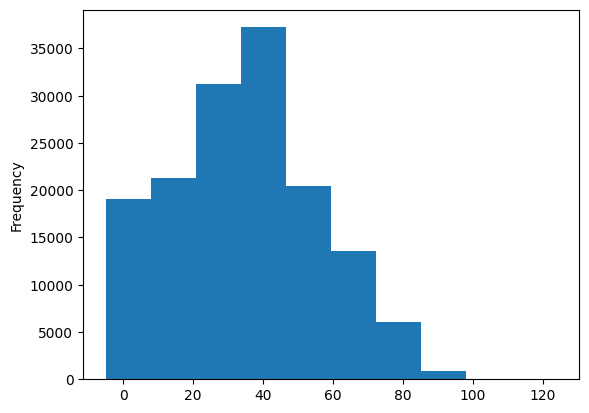

In [48]:
patient_data.age.plot.hist()

In [49]:
from sklearn.impute import SimpleImputer

In [50]:
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(patient_data.age.values.reshape(-1, 1))

SimpleImputer(strategy='median')

In [51]:
imp_age = imp.transform(patient_data.age.values.reshape(-1, 1))

In [52]:
patient_data['imp_age'] = imp_age

In [53]:
patient_data.head()

,institution_id,patient_id,dob,sex,state,matched_states,new_state,age,imp_age
0,9db63f62-5c58-4303-919e-e23681909271,273KC6WWA,1993-03-06,male,ogun,ogun,ogun,31.0,31.0
1,6762b0cd-12c6-4026-8886-ce15a48a6398,28D62KK5S,1959-04-20,male,kano,kano,kano,65.0,65.0
2,0fa2e546-c292-4060-a05e-beb53fc31e72,2CEW8BKP6,1935-10-09,female,delta,delta,delta,89.0,89.0
3,4bb14745-4254-4247-9b84-bd4fc63583b0,2DKKD2X8R,1950-12-03,male,cross river,cross river,cross river,73.0,73.0
4,3b883d89-83bd-41a1-9eb1-ee76eb22d897,2GBEK724E,1981-07-13,male,akwa ibom,akwa ibom,akwa ibom,43.0,43.0


In [54]:
patient_data[patient_data.age.isna()]

,institution_id,patient_id,dob,sex,state,matched_states,new_state,age,imp_age
84,19adebda-8361-4267-8ab0-7fe734377602,FH4CQ8UED,NaT,female,,,not_provided,NaN,35.0
222,0da8e9a5-855d-42c5-9435-d69e1019cafc,5CDNEWFEW,NaT,female,,,not_provided,NaN,35.0
282,19adebda-8361-4267-8ab0-7fe734377602,DPENZZZMD,NaT,female,,,not_provided,NaN,35.0
435,0da8e9a5-855d-42c5-9435-d69e1019cafc,35TCHUBDJ,NaT,female,,,not_provided,NaN,35.0
737,6762b0cd-12c6-4026-8886-ce15a48a6398,EBYGNKCTC,NaT,female,,,not_provided,NaN,35.0
...,...,...,...,...,...,...,...,...,...
69100,46412e2a-6b5f-4d0c-9562-d89c01d15259,A5DHHU89U,NaT,male,,,not_provided,NaN,35.0
69222,46412e2a-6b5f-4d0c-9562-d89c01d15259,BAZYRDRA4,NaT,female,,,not_provided,NaN,35.0
69250,46412e2a-6b5f-4d0c-9562-d89c01d15259,4WVYF24NV,NaT,male,,,not_provided,NaN,35.0
69297,46412e2a-6b5f-4d0c-9562-d89c01d15259,S2DMKQUEN,NaT,male,,,not_provided,NaN,35.0


#### Handle Sex

In [55]:
sum(patient_data.sex.isna())

170

In [56]:
patient_data[patient_data.sex.isna()]

,institution_id,patient_id,dob,sex,state,matched_states,new_state,age,imp_age
13,f44a6715-552e-40ea-8dd5-c690313e5072,3XTCKQVMD,1952-12-24,NaN,,,not_provided,71.0,71.0
196,f44a6715-552e-40ea-8dd5-c690313e5072,28ZDCUNES,1965-03-02,NaN,,,not_provided,59.0,59.0
275,f44a6715-552e-40ea-8dd5-c690313e5072,CQXWJB2F4,1953-05-05,NaN,,,not_provided,71.0,71.0
452,f44a6715-552e-40ea-8dd5-c690313e5072,5DEHYJTGQ,1970-09-01,NaN,,,not_provided,54.0,54.0
669,f44a6715-552e-40ea-8dd5-c690313e5072,4WE2XUGPF,2017-01-03,NaN,,,not_provided,7.0,7.0
...,...,...,...,...,...,...,...,...,...
19960,f44a6715-552e-40ea-8dd5-c690313e5072,2T7BDNFMQ,2000-11-15,NaN,,,not_provided,24.0,24.0
20048,f44a6715-552e-40ea-8dd5-c690313e5072,GWUTHNEK8,1978-08-06,NaN,,,not_provided,46.0,46.0
20183,f44a6715-552e-40ea-8dd5-c690313e5072,3THZNW62R,1980-06-14,NaN,,,not_provided,44.0,44.0
20284,f44a6715-552e-40ea-8dd5-c690313e5072,JBDZ3KN46,1962-04-20,NaN,,,not_provided,62.0,62.0


In [57]:
from sklearn.preprocessing import LabelEncoder

In [58]:
sex_le = LabelEncoder()
sex_le.fit(patient_data.sex.values)

LabelEncoder()

In [59]:
patient_data['sex_imp'] = sex_le.transform(patient_data.sex.values)
patient_data.head()

,institution_id,patient_id,dob,sex,state,matched_states,new_state,age,imp_age,sex_imp
0,9db63f62-5c58-4303-919e-e23681909271,273KC6WWA,1993-03-06,male,ogun,ogun,ogun,31.0,31.0,1
1,6762b0cd-12c6-4026-8886-ce15a48a6398,28D62KK5S,1959-04-20,male,kano,kano,kano,65.0,65.0,1
2,0fa2e546-c292-4060-a05e-beb53fc31e72,2CEW8BKP6,1935-10-09,female,delta,delta,delta,89.0,89.0,0
3,4bb14745-4254-4247-9b84-bd4fc63583b0,2DKKD2X8R,1950-12-03,male,cross river,cross river,cross river,73.0,73.0,1
4,3b883d89-83bd-41a1-9eb1-ee76eb22d897,2GBEK724E,1981-07-13,male,akwa ibom,akwa ibom,akwa ibom,43.0,43.0,1


In [60]:
patient_data.sex_imp[patient_data.sex.isna()] = np.nan

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_61860/1262839542.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  patient_data.sex_imp[patient_data.sex.isna()] = np.nan
/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel

In [61]:
patient_data[patient_data.sex.isna()]

,institution_id,patient_id,dob,sex,state,matched_states,new_state,age,imp_age,sex_imp
13,f44a6715-552e-40ea-8dd5-c690313e5072,3XTCKQVMD,1952-12-24,NaN,,,not_provided,71.0,71.0,NaN
196,f44a6715-552e-40ea-8dd5-c690313e5072,28ZDCUNES,1965-03-02,NaN,,,not_provided,59.0,59.0,NaN
275,f44a6715-552e-40ea-8dd5-c690313e5072,CQXWJB2F4,1953-05-05,NaN,,,not_provided,71.0,71.0,NaN
452,f44a6715-552e-40ea-8dd5-c690313e5072,5DEHYJTGQ,1970-09-01,NaN,,,not_provided,54.0,54.0,NaN
669,f44a6715-552e-40ea-8dd5-c690313e5072,4WE2XUGPF,2017-01-03,NaN,,,not_provided,7.0,7.0,NaN
...,...,...,...,...,...,...,...,...,...,...
19960,f44a6715-552e-40ea-8dd5-c690313e5072,2T7BDNFMQ,2000-11-15,NaN,,,not_provided,24.0,24.0,NaN
20048,f44a6715-552e-40ea-8dd5-c690313e5072,GWUTHNEK8,1978-08-06,NaN,,,not_provided,46.0,46.0,NaN
20183,f44a6715-552e-40ea-8dd5-c690313e5072,3THZNW62R,1980-06-14,NaN,,,not_provided,44.0,44.0,NaN
20284,f44a6715-552e-40ea-8dd5-c690313e5072,JBDZ3KN46,1962-04-20,NaN,,,not_provided,62.0,62.0,NaN


In [62]:
sex_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
sex_imp.fit(patient_data.sex_imp.values.reshape(-1, 1))

SimpleImputer(strategy='most_frequent')

In [63]:
imp_sex = sex_imp.transform(patient_data.sex_imp.values.reshape(-1, 1))

In [64]:
patient_data['imp_sex'] = imp_sex

In [65]:
patient_data.head()

,institution_id,patient_id,dob,sex,state,matched_states,new_state,age,imp_age,sex_imp,imp_sex
0,9db63f62-5c58-4303-919e-e23681909271,273KC6WWA,1993-03-06,male,ogun,ogun,ogun,31.0,31.0,1.0,1.0
1,6762b0cd-12c6-4026-8886-ce15a48a6398,28D62KK5S,1959-04-20,male,kano,kano,kano,65.0,65.0,1.0,1.0
2,0fa2e546-c292-4060-a05e-beb53fc31e72,2CEW8BKP6,1935-10-09,female,delta,delta,delta,89.0,89.0,0.0,0.0
3,4bb14745-4254-4247-9b84-bd4fc63583b0,2DKKD2X8R,1950-12-03,male,cross river,cross river,cross river,73.0,73.0,1.0,1.0
4,3b883d89-83bd-41a1-9eb1-ee76eb22d897,2GBEK724E,1981-07-13,male,akwa ibom,akwa ibom,akwa ibom,43.0,43.0,1.0,1.0


In [66]:
patient_data[patient_data.sex.isna()]

,institution_id,patient_id,dob,sex,state,matched_states,new_state,age,imp_age,sex_imp,imp_sex
13,f44a6715-552e-40ea-8dd5-c690313e5072,3XTCKQVMD,1952-12-24,NaN,,,not_provided,71.0,71.0,NaN,0.0
196,f44a6715-552e-40ea-8dd5-c690313e5072,28ZDCUNES,1965-03-02,NaN,,,not_provided,59.0,59.0,NaN,0.0
275,f44a6715-552e-40ea-8dd5-c690313e5072,CQXWJB2F4,1953-05-05,NaN,,,not_provided,71.0,71.0,NaN,0.0
452,f44a6715-552e-40ea-8dd5-c690313e5072,5DEHYJTGQ,1970-09-01,NaN,,,not_provided,54.0,54.0,NaN,0.0
669,f44a6715-552e-40ea-8dd5-c690313e5072,4WE2XUGPF,2017-01-03,NaN,,,not_provided,7.0,7.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
19960,f44a6715-552e-40ea-8dd5-c690313e5072,2T7BDNFMQ,2000-11-15,NaN,,,not_provided,24.0,24.0,NaN,0.0
20048,f44a6715-552e-40ea-8dd5-c690313e5072,GWUTHNEK8,1978-08-06,NaN,,,not_provided,46.0,46.0,NaN,0.0
20183,f44a6715-552e-40ea-8dd5-c690313e5072,3THZNW62R,1980-06-14,NaN,,,not_provided,44.0,44.0,NaN,0.0
20284,f44a6715-552e-40ea-8dd5-c690313e5072,JBDZ3KN46,1962-04-20,NaN,,,not_provided,62.0,62.0,NaN,0.0


In [67]:
patient_data.sex_imp.value_counts()

sex_imp
0.0    81170
1.0    68718
Name: count, dtype: int64

In [68]:
patient_data.imp_sex.value_counts()

imp_sex
0.0    81340
1.0    68718
Name: count, dtype: int64

In [69]:
main_patient_cols = ['institution_id','patient_id','new_state','imp_age','imp_sex']
patient_data[main_patient_cols].head()

,institution_id,patient_id,new_state,imp_age,imp_sex
0,9db63f62-5c58-4303-919e-e23681909271,273KC6WWA,ogun,31.0,1.0
1,6762b0cd-12c6-4026-8886-ce15a48a6398,28D62KK5S,kano,65.0,1.0
2,0fa2e546-c292-4060-a05e-beb53fc31e72,2CEW8BKP6,delta,89.0,0.0
3,4bb14745-4254-4247-9b84-bd4fc63583b0,2DKKD2X8R,cross river,73.0,1.0
4,3b883d89-83bd-41a1-9eb1-ee76eb22d897,2GBEK724E,akwa ibom,43.0,1.0


In [70]:
new_patient_data = patient_data[main_patient_cols]
new_patient_data.rename({'imp_sex': 'sex', 'imp_age': 'age'}, axis=1, inplace=True)

/var/folders/yd/36hqj6y53ks959xgzn2k7htw0000gn/T/ipykernel_61860/3848541596.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_patient_data.rename({'imp_sex': 'sex', 'imp_age': 'age'}, axis=1, inplace=True)


In [71]:
new_patient_data.head()

,institution_id,patient_id,new_state,age,sex
0,9db63f62-5c58-4303-919e-e23681909271,273KC6WWA,ogun,31.0,1.0
1,6762b0cd-12c6-4026-8886-ce15a48a6398,28D62KK5S,kano,65.0,1.0
2,0fa2e546-c292-4060-a05e-beb53fc31e72,2CEW8BKP6,delta,89.0,0.0
3,4bb14745-4254-4247-9b84-bd4fc63583b0,2DKKD2X8R,cross river,73.0,1.0
4,3b883d89-83bd-41a1-9eb1-ee76eb22d897,2GBEK724E,akwa ibom,43.0,1.0


In [72]:
new_patient_data.to_csv('data/patient_data_cleaned.csv')

### Handle Visit data

In [73]:
hospital_data.head()

,visit_id,patient_id,institution_id,admitted_at,discharged_at,inserted_at,updated_at,visit_type,type
0,c7febda4-7460-45d9-b5a4-b8d56e0ed102,3KD75TWXQ,4850e9c9-2945-4087-b4f9-6c302e44b84e,NaN,NaN,2021-09-10,2021-09-10 18:30:57.125970,out-patient,hospital
1,5299e941-0936-4e5d-a615-c4ba1c40bd7d,5CQ5ZPTU3,b05bec66-9c3b-4381-9ad2-0636481ca919,NaN,NaN,2021-05-19,2021-05-19 17:00:05.466195,out-patient,hospital
2,79bd7fc4-45c1-4a80-87f0-62b446b66b10,6YNECWS7F,b05bec66-9c3b-4381-9ad2-0636481ca919,NaN,NaN,2021-11-22,2021-11-22 10:28:32.551820,out-patient,hospital
3,eace4e9a-ef8a-433e-8134-4ea2a28a75f8,A456Q4VZ5,f7427dbb-e87d-4ed2-b168-136c244596b2,NaN,NaN,2021-04-16,2021-04-16 09:27:47.728220,out-patient,hospital
4,3250d7a4-05a4-46f0-a561-1d5871e45d89,A89QTDQFZ,60a3c3ea-eff0-4b6a-9d8c-52a6b4fc54e7,NaN,NaN,2021-11-18,2021-11-18 09:28:28.459856,out-patient,hospital


In [74]:
hospital_data.visit_id.nunique(), hospital_data.shape

(448598, (448600, 9))

In [75]:
hospital_data.visit_id.value_counts()

visit_id
daf97e72-b1f5-46c4-aa56-8865c196daa2    2
19327cda-60ca-4243-a94d-9e741e739a2f    2
81b777b2-e428-49bb-b0fa-f99f9573be16    1
210ae41a-b178-4642-8103-6d1ee849055f    1
d4238e49-88d0-4a10-9a2e-fafdeec1a984    1
                                       ..
73039069-5fc6-4c51-8be2-954d2d05da3f    1
399333a1-0ab4-4813-9603-d8c8add8816d    1
e0090a77-c234-4da4-ab66-e628b02636d8    1
3da77409-f4e0-4218-9a6f-9a56a9507067    1
a36db8bd-17ba-4508-9799-cfa0ba7151d1    1
Name: count, Length: 448598, dtype: int64

In [76]:
hospital_data[hospital_data.visit_id=='19327cda-60ca-4243-a94d-9e741e739a2f']

,visit_id,patient_id,institution_id,admitted_at,discharged_at,inserted_at,updated_at,visit_type,type
33388,19327cda-60ca-4243-a94d-9e741e739a2f,KFBDFY9AA,c7d5aa80-47af-45fd-95d3-c575a44806e5,NaN,NaN,2021-01-14,2021-01-14 11:24:11.053782,out-patient,hospital
33389,19327cda-60ca-4243-a94d-9e741e739a2f,KFBDFY9AA,c7d5aa80-47af-45fd-95d3-c575a44806e5,NaN,NaN,2021-01-14,2021-01-14 11:24:11.053782,out-patient,hospital


In [77]:
hospital_data = hospital_data.drop_duplicates(subset='visit_id', keep='first')
hospital_data.shape

(448598, 9)

In [78]:
hospital_data.patient_id.nunique()

150513

In [79]:
hospital_data[~hospital_data.patient_id.isin(new_patient_data.patient_id.tolist())]

,visit_id,patient_id,institution_id,admitted_at,discharged_at,inserted_at,updated_at,visit_type,type
6,e145d072-2f44-4529-9707-6c48475b793f,DADSQS2JH,59e7bf52-fe9d-44a4-a8de-87f0e65478ab,NaN,NaN,2021-12-01,2021-12-01 12:33:44.230010,out-patient,hospital
113,19aa6e62-73df-4b00-bba0-f713f5725ea8,K35BNR2GV,4b952988-bfa5-498f-8d17-e394fb339044,NaN,NaN,2021-12-01,2021-12-01 18:38:43.162690,out-patient,clinic
369,b98c29f6-ee7d-4531-98df-faa62aad9e52,6CFGBS2UA,f7427dbb-e87d-4ed2-b168-136c244596b2,2021-12-01 08:37:20,2021-12-02 10:31:25,2021-12-01,2021-12-02 10:31:25.142380,in-patient,hospital
938,bf2f37a7-0d40-4ca2-9ba9-40ea89598238,E78T8ZKJF,95541ac0-e5ce-493f-b6a4-66142989ad8e,NaN,NaN,2021-12-01,2021-12-01 14:28:26.964414,out-patient,hospital
1455,ea573165-9406-4306-831a-be5eed0e40ae,FFDGMDE4R,133cb894-ef0c-4ebd-9100-76431a60fac5,NaN,NaN,2021-12-01,2021-12-01 10:14:35.896535,out-patient,hospital
...,...,...,...,...,...,...,...,...,...
439627,557ef613-986e-4612-8de3-3904e9ccb6b9,VH5CA5TQH,f7a11005-e09a-431b-afe9-95e8ddac81d8,NaN,NaN,2021-12-01,2021-12-01 17:01:44.193287,out-patient,hospital
441198,1388bf4f-9bfb-4902-8ee5-4b9520ab61de,CUYBUV58M,f7a11005-e09a-431b-afe9-95e8ddac81d8,NaN,NaN,2021-12-01,2021-12-01 18:16:16.627994,out-patient,hospital
445506,854ca02d-6097-4cfb-86b2-53c952335bce,K344C94M3,f7a11005-e09a-431b-afe9-95e8ddac81d8,NaN,NaN,2021-12-01,2021-12-01 07:44:06.791904,out-patient,hospital
446870,55ea1d1a-aa4e-4cfd-9a9c-343f6f33dfde,56E2KZKTQ,f7a11005-e09a-431b-afe9-95e8ddac81d8,NaN,NaN,2021-12-01,2021-12-01 16:07:50.941017,out-patient,hospital


In [80]:
hospital_data.tail()

,visit_id,patient_id,institution_id,admitted_at,discharged_at,inserted_at,updated_at,visit_type,type
448595,f8ff5061-7ba2-4c74-9b2b-c2bff2ea7912,EUDMFBTDU,f7a11005-e09a-431b-afe9-95e8ddac81d8,NaN,NaN,2021-10-22,2021-10-22 11:20:03.069039,out-patient,hospital
448596,bb7bd75c-bcb1-4ec7-b525-5ef34fe0b0c8,GU2W8VWZH,f7a11005-e09a-431b-afe9-95e8ddac81d8,NaN,NaN,2021-04-01,2021-04-01 10:12:53.883011,out-patient,hospital
448597,092071a6-f6cf-4801-8b94-1e4cb9d3de20,HASAQYBRN,f7a11005-e09a-431b-afe9-95e8ddac81d8,NaN,NaN,2021-06-14,2021-06-14 08:29:13.988130,out-patient,hospital
448598,0032b905-d3f3-4e7d-91f5-a82b92104863,WT5H74FKX,f7a11005-e09a-431b-afe9-95e8ddac81d8,NaN,NaN,2021-05-02,2021-05-02 07:19:40.610405,out-patient,hospital
448599,a36db8bd-17ba-4508-9799-cfa0ba7151d1,WT5H74FKX,f7a11005-e09a-431b-afe9-95e8ddac81d8,NaN,NaN,2021-10-24,2021-10-24 12:01:10.649689,out-patient,hospital


In [81]:
cleaned_hospital_data = hospital_data[hospital_data.patient_id.isin(new_patient_data.patient_id.tolist())]
cleaned_hospital_data.shape

(448140, 9)

In [82]:
cleaned_hospital_data.sample(10)

,visit_id,patient_id,institution_id,admitted_at,discharged_at,inserted_at,updated_at,visit_type,type
96096,d924cd6c-51f2-428b-aea6-a27fcfa21345,4AT4ENG2H,19ae2f00-60e7-4db1-8719-644820cc04df,NaN,NaN,2021-11-24,2021-11-24 21:08:50.058594,out-patient,hospital
307569,92f9d4e0-37f8-46fd-8064-3d4ac45eea16,5G5X2BNA4,9db090cf-184b-450e-a07a-97dee812ce0d,NaN,NaN,2021-07-15,2021-07-15 11:41:42.330320,out-patient,hospital
338947,3b86a978-ec49-487f-9c62-9b0730337105,4ZJS2USF2,bd9a1f13-a52c-4372-a63c-1e49bd7a7bf3,NaN,NaN,2021-08-28,2021-08-28 14:37:19.836875,out-patient,hospital
235643,f4e1fcdc-9f8a-4456-9b58-0e6ac7efcb46,Y9QQ89GHC,5ee1f2ed-2622-4012-8c2f-aca9f5c1af3f,NaN,NaN,2021-09-12,2021-09-12 17:34:37.503422,out-patient,hospital
5539,67ca0c15-48f9-44b8-9112-877ba12deb62,YFS9R4EFY,1a75706d-889a-48ab-a6c7-1fbbd70aeda8,NaN,NaN,2021-08-18,2021-08-18 06:07:58.489387,out-patient,hospital
367217,80d81149-82c8-4273-8be4-a5d607d56763,8PRCQEQGB,d9f64a07-9c47-4f6e-8bbe-a473a688a735,NaN,NaN,2021-01-14,2021-01-14 10:41:26.259133,out-patient,hospital
390931,202bbfbf-01b8-4f5d-812c-c750a5d50437,ZR3C8BYVB,d9f64a07-9c47-4f6e-8bbe-a473a688a735,NaN,NaN,2021-08-12,2021-08-12 10:02:15.601505,out-patient,hospital
420606,b8b79c2d-741b-4246-8ec7-19f6c5d04a51,CB66ZB5MQ,ece0641a-2b44-4cb1-8e31-074dd5fbb4f1,NaN,NaN,2021-02-17,2021-02-17 08:53:47.572784,out-patient,hospital
282994,aee408b2-3cfb-4760-a457-a75233befdcd,BWHRHMNVN,89629d26-4538-4730-a6f1-cddda2435218,NaN,NaN,2021-07-15,2021-07-15 08:21:56.394835,out-patient,hospital
339427,90431494-0f49-4500-9ad1-10712402975f,Z5YW983BA,bd9a1f13-a52c-4372-a63c-1e49bd7a7bf3,NaN,NaN,2021-07-24,2021-07-24 15:39:05.484052,out-patient,hospital


In [83]:
sum(~cleaned_hospital_data.admitted_at.isna()), sum(~cleaned_hospital_data.discharged_at.isna())

(17953, 18053)

In [84]:
# Drop admitted and discharged at, updated at
cleaned_hospital_data = cleaned_hospital_data.drop(['admitted_at','discharged_at','updated_at'], axis=1)

In [85]:
cleaned_hospital_data.sample(10)

,visit_id,patient_id,institution_id,inserted_at,visit_type,type
349407,3818106a-8b96-4e09-8d6e-8e7fb824dee7,4JQ2Q4HES,c2dc34b5-7a9b-4dcb-85ae-b3b6c23d823e,2021-02-16,out-patient,hospital
162124,7e3d69ba-9832-41ed-9cbf-6e8baf732e76,KX64PEX4F,384b1f28-514a-4a8f-8cc2-f5b2f94d7d09,2021-01-18,out-patient,hospital
119307,acc5bc4e-f0c0-4ce2-8ebe-4be23e2dadc4,RSNDR62QB,19ae2f00-60e7-4db1-8719-644820cc04df,2021-10-07,out-patient,hospital
93812,20d539a0-323e-4942-a885-5f6de3730381,7BHUAG79X,18cb6e95-6073-4102-989e-1b133ac99b29,2021-07-08,out-patient,laboratory
246749,47f3225c-4654-43e3-a743-53d9c12aa249,G6DUFGZ7W,67d433c3-01fc-48b8-b86f-83c325fe51cf,2021-08-06,out-patient,hospital
188699,f5420c38-f6f5-4432-bf65-a8eb29544b0a,KB72KY24P,3fc67f73-037c-4f06-9edf-b7ff94cd1570,2021-03-23,out-patient,hospital
418064,9668562a-5cc4-401e-9e55-a0e28b9111d1,37KYVCYHM,ece0641a-2b44-4cb1-8e31-074dd5fbb4f1,2021-11-12,out-patient,hospital
10032,d4769dc0-c10c-48d6-a716-390f4403404a,4NJTUFEPW,f44a6715-552e-40ea-8dd5-c690313e5072,2021-05-17,out-patient,clinic
59235,4559d55f-f094-4363-8976-c20b097d1bea,7VSPCENXD,0503125e-929a-4eed-afd6-25213a7b87c7,2021-05-26,out-patient,hospital
313365,75b340ff-f51b-497c-9a67-08eaa58e6786,F2DFVNP5Q,9db090cf-184b-450e-a07a-97dee812ce0d,2021-04-30,out-patient,hospital


In [86]:
cleaned_hospital_data.to_csv('data/hospital_visit_cleaned.csv')

### Merge DFs

In [87]:
new_patient_data.head()

,institution_id,patient_id,new_state,age,sex
0,9db63f62-5c58-4303-919e-e23681909271,273KC6WWA,ogun,31.0,1.0
1,6762b0cd-12c6-4026-8886-ce15a48a6398,28D62KK5S,kano,65.0,1.0
2,0fa2e546-c292-4060-a05e-beb53fc31e72,2CEW8BKP6,delta,89.0,0.0
3,4bb14745-4254-4247-9b84-bd4fc63583b0,2DKKD2X8R,cross river,73.0,1.0
4,3b883d89-83bd-41a1-9eb1-ee76eb22d897,2GBEK724E,akwa ibom,43.0,1.0


In [88]:
cleaned_hospital_data.head()

,visit_id,patient_id,institution_id,inserted_at,visit_type,type
0,c7febda4-7460-45d9-b5a4-b8d56e0ed102,3KD75TWXQ,4850e9c9-2945-4087-b4f9-6c302e44b84e,2021-09-10,out-patient,hospital
1,5299e941-0936-4e5d-a615-c4ba1c40bd7d,5CQ5ZPTU3,b05bec66-9c3b-4381-9ad2-0636481ca919,2021-05-19,out-patient,hospital
2,79bd7fc4-45c1-4a80-87f0-62b446b66b10,6YNECWS7F,b05bec66-9c3b-4381-9ad2-0636481ca919,2021-11-22,out-patient,hospital
3,eace4e9a-ef8a-433e-8134-4ea2a28a75f8,A456Q4VZ5,f7427dbb-e87d-4ed2-b168-136c244596b2,2021-04-16,out-patient,hospital
4,3250d7a4-05a4-46f0-a561-1d5871e45d89,A89QTDQFZ,60a3c3ea-eff0-4b6a-9d8c-52a6b4fc54e7,2021-11-18,out-patient,hospital


In [89]:
new_patient_data.shape, cleaned_hospital_data.shape

((150058, 5), (448140, 6))

In [90]:
merged_data = pd.merge(cleaned_hospital_data, new_patient_data, on=['patient_id', 'institution_id'], how='left')
merged_data.shape

(448142, 9)

In [91]:
merged_data.head()

,visit_id,patient_id,institution_id,inserted_at,visit_type,type,new_state,age,sex
0,c7febda4-7460-45d9-b5a4-b8d56e0ed102,3KD75TWXQ,4850e9c9-2945-4087-b4f9-6c302e44b84e,2021-09-10,out-patient,hospital,kano,96.0,0.0
1,5299e941-0936-4e5d-a615-c4ba1c40bd7d,5CQ5ZPTU3,b05bec66-9c3b-4381-9ad2-0636481ca919,2021-05-19,out-patient,hospital,ogun,43.0,0.0
2,79bd7fc4-45c1-4a80-87f0-62b446b66b10,6YNECWS7F,b05bec66-9c3b-4381-9ad2-0636481ca919,2021-11-22,out-patient,hospital,ogun,5.0,0.0
3,eace4e9a-ef8a-433e-8134-4ea2a28a75f8,A456Q4VZ5,f7427dbb-e87d-4ed2-b168-136c244596b2,2021-04-16,out-patient,hospital,ekiti,37.0,0.0
4,3250d7a4-05a4-46f0-a561-1d5871e45d89,A89QTDQFZ,60a3c3ea-eff0-4b6a-9d8c-52a6b4fc54e7,2021-11-18,out-patient,hospital,ekiti,34.0,0.0


In [92]:
merged_data.visit_id.value_counts()

visit_id
19327cda-60ca-4243-a94d-9e741e739a2f    2
daf97e72-b1f5-46c4-aa56-8865c196daa2    2
c7febda4-7460-45d9-b5a4-b8d56e0ed102    1
2fe06db3-13fe-4a63-98df-82533feac48b    1
c2727249-34d4-4514-8951-6392d1b26b8c    1
                                       ..
3388349d-b6c9-4c14-a51c-6d87562ca986    1
cb78802f-4693-47e0-8def-78266450b0c3    1
67df5c9d-d1da-4ff1-848c-36faf3b717c3    1
25bee934-d7fd-481b-9227-02272973b9a7    1
a36db8bd-17ba-4508-9799-cfa0ba7151d1    1
Name: count, Length: 448140, dtype: int64

In [93]:
merged_data[merged_data.visit_id=='19327cda-60ca-4243-a94d-9e741e739a2f']

,visit_id,patient_id,institution_id,inserted_at,visit_type,type,new_state,age,sex
33322,19327cda-60ca-4243-a94d-9e741e739a2f,KFBDFY9AA,c7d5aa80-47af-45fd-95d3-c575a44806e5,2021-01-14,out-patient,hospital,not_provided,47.0,0.0
33323,19327cda-60ca-4243-a94d-9e741e739a2f,KFBDFY9AA,c7d5aa80-47af-45fd-95d3-c575a44806e5,2021-01-14,out-patient,hospital,ogun,47.0,0.0


In [94]:
merged_data.drop([30987,33322], inplace=True)
merged_data.shape

(448140, 9)

In [95]:
merged_data.sample(10)

,visit_id,patient_id,institution_id,inserted_at,visit_type,type,new_state,age,sex
170517,33bfb8fd-b538-4cd3-9ef1-6e76e4098452,SDJQRG7E6,3bbbf782-497c-4697-abda-0a88bbee1b38,2021-09-29,out-patient,hospital,delta,31.0,0.0
445896,ff4528a5-82d9-4772-b868-62429e68059f,AGSHR9DF8,f7a11005-e09a-431b-afe9-95e8ddac81d8,2021-02-10,out-patient,hospital,ogun,35.0,0.0
358591,7ae080af-692c-4eca-93cd-de1a006695a7,DT5JS4BPR,cf3a43b2-0fef-4db8-873b-6b24e49cfbf3,2021-11-14,out-patient,hospital,not_provided,34.0,0.0
317897,a128ab53-264c-4669-b0fd-2131183d84c4,FG2NKFZ8H,9e1484a3-0235-48c5-aeed-c44451c918fa,2021-04-22,out-patient,hospital,not_provided,33.0,0.0
284259,5e005b81-b608-41d4-9965-3b9f6d5acd7e,QN6TEM9VM,89629d26-4538-4730-a6f1-cddda2435218,2021-03-27,out-patient,hospital,not_provided,64.0,0.0
288598,49d7fb6e-fa13-4d4e-a6dd-eca29a8658a9,GHJCTTU9A,92f0c501-8e06-4d0e-9cda-a25f5d97dfb5,2021-06-30,out-patient,hospital,cross river,21.0,1.0
249975,ec3613ce-36e5-485b-9ff5-c5907f8a8d7e,CQR6JHSSC,67d433c3-01fc-48b8-b86f-83c325fe51cf,2021-06-10,out-patient,hospital,not_provided,11.0,1.0
178557,8f7f5a8f-5318-40f4-ab20-7f4b60666c96,UTPCW3D3A,3bbbf782-497c-4697-abda-0a88bbee1b38,2021-08-20,out-patient,hospital,not_provided,33.0,1.0
328258,f58b09be-2b1e-4c62-bd68-9b760b41b07f,4PKZ9P79H,acc05561-603e-409d-9446-4d03353d7a5c,2021-09-29,out-patient,hospital,kwara,57.0,0.0
205283,9a5edf10-6151-4bca-964e-3e2a48837a2e,BA6BXDPFW,47dc4136-1684-49ed-a1da-945486345c68,2021-10-14,out-patient,hospital,not_provided,31.0,1.0


In [96]:
merged_data.to_csv('data/merged_data_chkpt_1.csv')

### Feature Engineering

In [97]:
%%time
visit_data = []
institution_group = merged_data.groupby(['institution_id', 'inserted_at'])
for i, x in enumerate(institution_group.groups):
    # print(x)
    group = institution_group.get_group(x)
    # print(group)

    in_patient = group[group.visit_type=='out-patient'].shape[0]
    out_patient = group[group.visit_type=='in-patient'].shape[0]

    no_male = group[group.sex==1.0].shape[0]
    no_female = group[group.sex==0.0].shape[0]

    inst_type = group.type.iloc[0]
    date = pd.to_datetime(x[1])

    obj = {
        'institution': x[0],
        'date': date,
        'visit_count': len(group),
        'inst_type': inst_type,
        'no_unique_patients': group['patient_id'].nunique(),
        'no_out_patients': out_patient,
        'no_in_patients': in_patient,
        'in_out_ratio': in_patient/out_patient if out_patient > 0 else 0,
        'avg_age': group['age'].mean(),
        'avg_male_age': group['age'][group.sex==1.0].mean(),
        'avg_female_age': group['age'][group.sex==0.0].mean(),
        'max_age': group['age'].max(),
        'min_age': group['age'].min(),
        'no_male': no_male,
        'no_female': no_female,        
        'no_unique_states': group['new_state'].nunique()
    }
    visit_data.append(obj)
    # break

CPU times: user 17 s, sys: 219 ms, total: 17.2 s
Wall time: 18.3 s


**Other features**: 
- No of return customers
- is public holiday
- is weekend
- Visited any institutions in the past?

In [98]:
merged_data.shape, len(visit_data)

((448140, 9), 25931)

In [99]:
visit_data = pd.DataFrame(visit_data)
visit_data.shape

(25931, 16)

In [100]:
visit_data.head()

,institution,date,visit_count,inst_type,no_unique_patients,no_out_patients,no_in_patients,in_out_ratio,avg_age,avg_male_age,avg_female_age,max_age,min_age,no_male,no_female,no_unique_states
0,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,2021-01-04,12,clinic,11,0,12,0.0,37.083333,NaN,37.083333,48.0,32.0,0,12,4
1,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,2021-01-06,16,clinic,16,0,16,0.0,39.500000,NaN,39.500000,50.0,31.0,0,16,6
2,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,2021-01-07,14,clinic,14,0,14,0.0,39.642857,NaN,39.642857,54.0,30.0,0,14,3
3,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,2021-01-08,12,clinic,12,0,12,0.0,36.750000,NaN,36.750000,48.0,27.0,0,12,5
4,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,2021-01-09,9,clinic,9,0,9,0.0,41.777778,NaN,41.777778,51.0,32.0,0,9,4


In [101]:
visit_data['date'] = pd.to_datetime(visit_data['date'])
visit_data.fillna(0, inplace=True)

In [102]:
visit_data.head()

,institution,date,visit_count,inst_type,no_unique_patients,no_out_patients,no_in_patients,in_out_ratio,avg_age,avg_male_age,avg_female_age,max_age,min_age,no_male,no_female,no_unique_states
0,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,2021-01-04,12,clinic,11,0,12,0.0,37.083333,0.0,37.083333,48.0,32.0,0,12,4
1,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,2021-01-06,16,clinic,16,0,16,0.0,39.500000,0.0,39.500000,50.0,31.0,0,16,6
2,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,2021-01-07,14,clinic,14,0,14,0.0,39.642857,0.0,39.642857,54.0,30.0,0,14,3
3,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,2021-01-08,12,clinic,12,0,12,0.0,36.750000,0.0,36.750000,48.0,27.0,0,12,5
4,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,2021-01-09,9,clinic,9,0,9,0.0,41.777778,0.0,41.777778,51.0,32.0,0,9,4


In [103]:
# !pip install tqdm

In [104]:
from tqdm.notebook import tqdm

In [105]:
ts_data = []
for institute in tqdm(visit_data.institution.unique()):
    sample_inst = visit_data[visit_data.institution==institute]

    sample_inst.set_index('date', inplace=True)
    sample_inst = sample_inst.resample('D').ffill()

    sample_inst['year'] = sample_inst.index.year
    sample_inst['month'] = sample_inst.index.month
    sample_inst['day'] = sample_inst.index.day
    sample_inst['dayofweek'] = sample_inst.index.dayofweek
    # sample_inst['week'] = sample_inst.index.week

    sample_inst['lag_1'] = sample_inst['visit_count'].shift(1)
    sample_inst['lag_2'] = sample_inst['visit_count'].shift(2)
    sample_inst['lag_3'] = sample_inst['visit_count'].shift(3)

    sample_inst['t1'] = sample_inst['visit_count'].shift(-1)
    sample_inst['t2'] = sample_inst['visit_count'].shift(-2)
    sample_inst['t3'] = sample_inst['visit_count'].shift(-3)
    
    sample_inst = sample_inst.iloc[3:, :]
    sample_inst = sample_inst.iloc[:-3, :]
    
    ts_data.append(sample_inst)

  0%|          | 0/140 [00:00<?, ?it/s]

In [106]:
time_series = pd.concat(ts_data)
time_series.shape

(32699, 25)

In [107]:
time_series.head()

,institution,visit_count,inst_type,no_unique_patients,no_out_patients,no_in_patients,in_out_ratio,avg_age,avg_male_age,avg_female_age,...,year,month,day,dayofweek,lag_1,lag_2,lag_3,t1,t2,t3
date,,,,,,,,,,,,,,,,,,,,,
2021-01-07,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,14,clinic,14,0,14,0.0,39.642857,0.0,39.642857,...,2021,1,7,3,16.0,12.0,12.0,12.0,9.0,9.0
2021-01-08,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,12,clinic,12,0,12,0.0,36.750000,0.0,36.750000,...,2021,1,8,4,14.0,16.0,12.0,9.0,9.0,11.0
2021-01-09,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,9,clinic,9,0,9,0.0,41.777778,0.0,41.777778,...,2021,1,9,5,12.0,14.0,16.0,9.0,11.0,17.0
2021-01-10,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,9,clinic,9,0,9,0.0,41.777778,0.0,41.777778,...,2021,1,10,6,9.0,12.0,14.0,11.0,17.0,10.0
2021-01-11,01811bcf-ec5b-4a02-a64a-0ac551f9d0ac,11,clinic,11,0,11,0.0,39.818182,0.0,39.818182,...,2021,1,11,0,9.0,9.0,12.0,17.0,10.0,14.0


In [108]:
time_series.month.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

In [109]:
time_series[time_series.month>=10].shape

(6159, 25)

In [110]:
time_series.to_csv('data/timeseries_data.csv')

In [111]:
time_series[time_series.isna().any(axis=1)]

,institution,visit_count,inst_type,no_unique_patients,no_out_patients,no_in_patients,in_out_ratio,avg_age,avg_male_age,avg_female_age,...,year,month,day,dayofweek,lag_1,lag_2,lag_3,t1,t2,t3
date,,,,,,,,,,,,,,,,,,,,,


In [112]:
new_patient_data[new_patient_data.isna().any(axis=1)]

,institution_id,patient_id,new_state,age,sex


In [113]:
time_series.sample(20)

,institution,visit_count,inst_type,no_unique_patients,no_out_patients,no_in_patients,in_out_ratio,avg_age,avg_male_age,avg_female_age,...,year,month,day,dayofweek,lag_1,lag_2,lag_3,t1,t2,t3
date,,,,,,,,,,,,,,,,,,,,,
2021-06-04,c2dc34b5-7a9b-4dcb-85ae-b3b6c23d823e,40,hospital,40,0,40,0.0,58.425000,63.923077,55.777778,...,2021,6,4,4,38.0,28.0,32.0,14.0,17.0,18.0
2021-05-31,f7a11005-e09a-431b-afe9-95e8ddac81d8,39,hospital,39,5,34,6.8,32.384615,33.071429,32.000000,...,2021,5,31,0,30.0,31.0,33.0,42.0,46.0,42.0
2021-11-20,89629d26-4538-4730-a6f1-cddda2435218,47,hospital,47,0,47,0.0,22.723404,22.782609,22.666667,...,2021,11,20,5,26.0,39.0,32.0,28.0,30.0,35.0
2021-11-10,4850e9c9-2945-4087-b4f9-6c302e44b84e,5,hospital,5,0,5,0.0,28.200000,27.500000,28.666667,...,2021,11,10,2,13.0,4.0,7.0,9.0,4.0,7.0
2021-08-12,f7a11005-e09a-431b-afe9-95e8ddac81d8,96,hospital,95,3,93,31.0,34.333333,33.490196,35.288889,...,2021,8,12,3,57.0,68.0,79.0,59.0,55.0,46.0
2021-01-08,cd756fae-c3e3-4176-a4f1-3e5360718d1d,16,hospital,16,2,14,7.0,32.687500,32.285714,35.500000,...,2021,1,8,4,16.0,11.0,31.0,15.0,12.0,20.0
2021-07-08,0fa2e546-c292-4060-a05e-beb53fc31e72,4,hospital,4,0,4,0.0,73.750000,76.000000,67.000000,...,2021,7,8,3,12.0,7.0,10.0,7.0,8.0,8.0
2021-03-21,19adebda-8361-4267-8ab0-7fe734377602,2,clinic,2,0,2,0.0,40.000000,0.000000,40.000000,...,2021,3,21,6,5.0,4.0,12.0,8.0,10.0,4.0
2021-08-10,ebb63a9f-bad7-486c-a79e-393b3d0589d2,10,hospital,10,0,10,0.0,51.000000,45.333333,53.428571,...,2021,8,10,1,7.0,4.0,14.0,9.0,18.0,6.0
